In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
plt.rcParams["figure.figsize"] = (8,8)

In [2]:
df = sns.load_dataset("diamonds")

We will explore the diamonds dataset. This is a nice dataset for dataexploration, because:

1. It is easy to form hypothesis about the dataset
2. There is a lot of data. Not 150 observations, like the iris-dataset, but more than 50k observations. This makes the plotting a bit more interesting.

The information available about the 10 variables:
1. price: price in US dollars (\$326--\$18,823)
2. carat: weight of the diamond (0.2--5.01)
3. cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
4. color: diamond colour, from D (best) to J (worst)
5. clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. x: length in mm (0--10.74)
7. y: width in mm (0--58.9)
8. z: depth in mm (0--31.8)
9. depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
10. table: width of top of diamond relative to widest point (43--95)

With this, let's start exploring.
First, let's explore with some basic `pandas` functions.

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


This doesnt tell us that much new. Let's check if everything is read in as expected with `.info()`

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


This seems to be correct. To me, the most straight forward relation I can spot is between carat and price. Big diamonds will cost more, right?

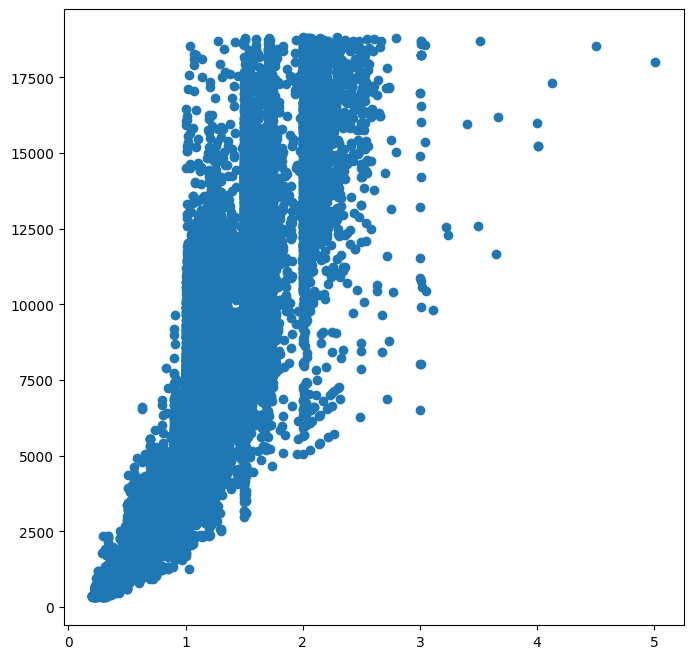

In [6]:
plt.scatter(data=df, x='carat', y='price')

That's a lot of points. Because there are 53k points, probably a lot will overlap. Let's make the points a bit transparent. 

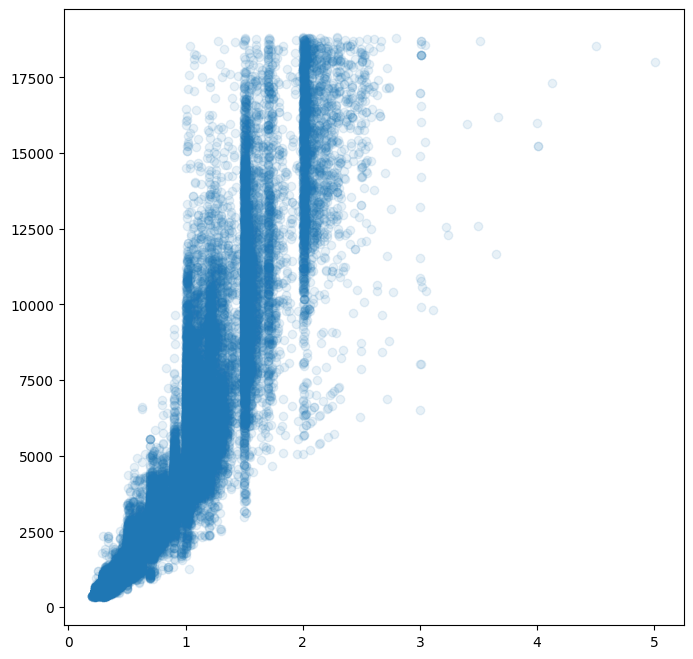

In [7]:
plt.scatter(data=df, x='carat', y='price', alpha=0.1)

That's better. At least we get some idea about the distribution. Let's try to zoom in a bit more. We see that another column is called `cut` which stands for the quality of the cut. This will probably have some impact. Lets use colors to see if that makes sense.

At the seaborn [documentation](https://seaborn.pydata.org/tutorial/color_palettes.html) we can look up the color palettes. Because this is `Sequential` data (ranging from low to high), we will pick one of the sequential colorschemes.

<AxesSubplot: xlabel='carat', ylabel='price'>

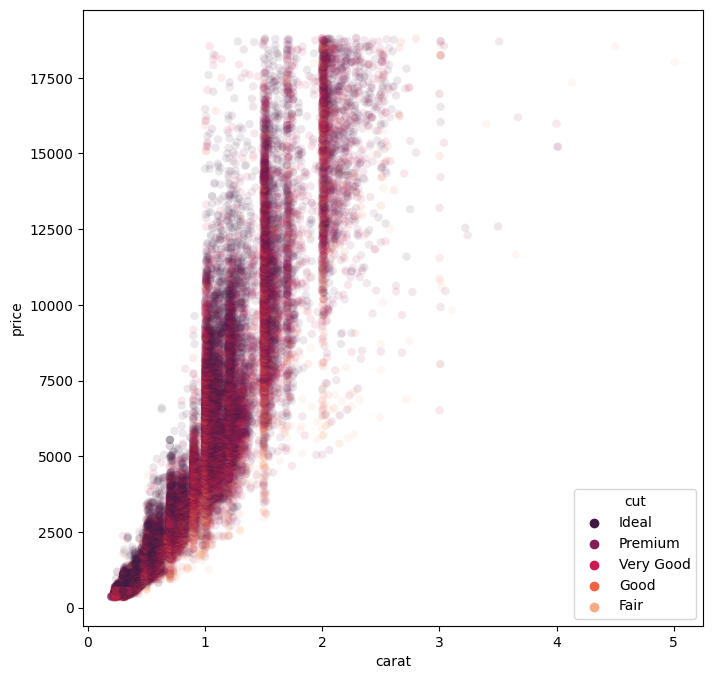

In [8]:
sns.scatterplot(data=df, x='carat', y='price',
    linewidth=0, alpha=0.1,
    hue='cut', palette='rocket')

Ok, nice, but now we have another problem. The colors are ordered alphabetically, but we want them ordered by their meaning. We can do this in different ways. One way is to use `hue_order`.

<AxesSubplot: xlabel='carat', ylabel='price'>

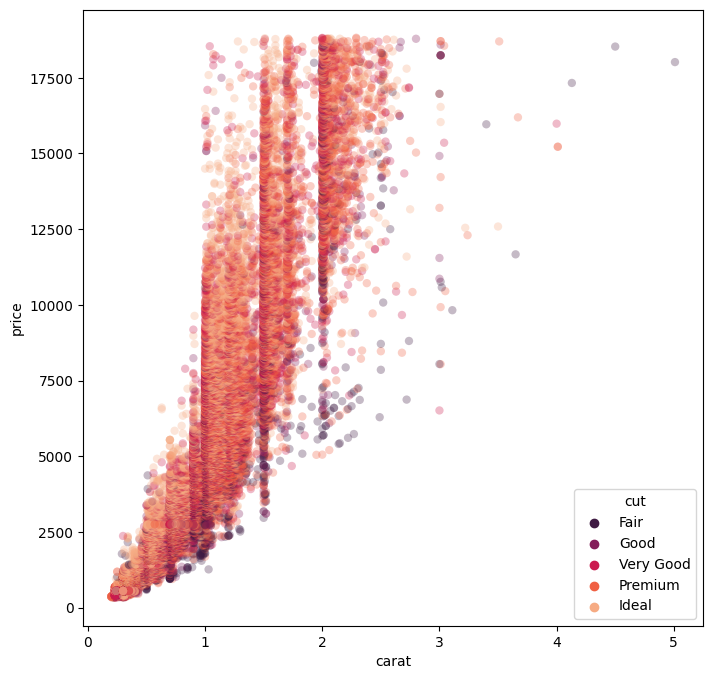

In [9]:
cutorder = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
sns.scatterplot(data=df, x='carat', y='price',
    alpha=0.3, linewidth=0,
    hue='cut', hue_order=cutorder, 
    palette='rocket')

Well, that seems to work. At least the colors are ordered. But it is still too crowded. Let's try to split things up with `FacetGrid`. But before that, let's use a better way than passing cutorder. The type of the `cut` column is a string. We can transform that into `category`, which is for categorical data, and pass an order.

In [10]:
df.cut = df.cut.astype('category')
df.cut.cat.set_categories(cutorder, inplace=True)

/var/folders/80/8s5yj3pd3y1_r8kgp_nlz26c0000gn/T/ipykernel_37337/104793623.py:2: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  df.cut.cat.set_categories(cutorder, inplace=True)


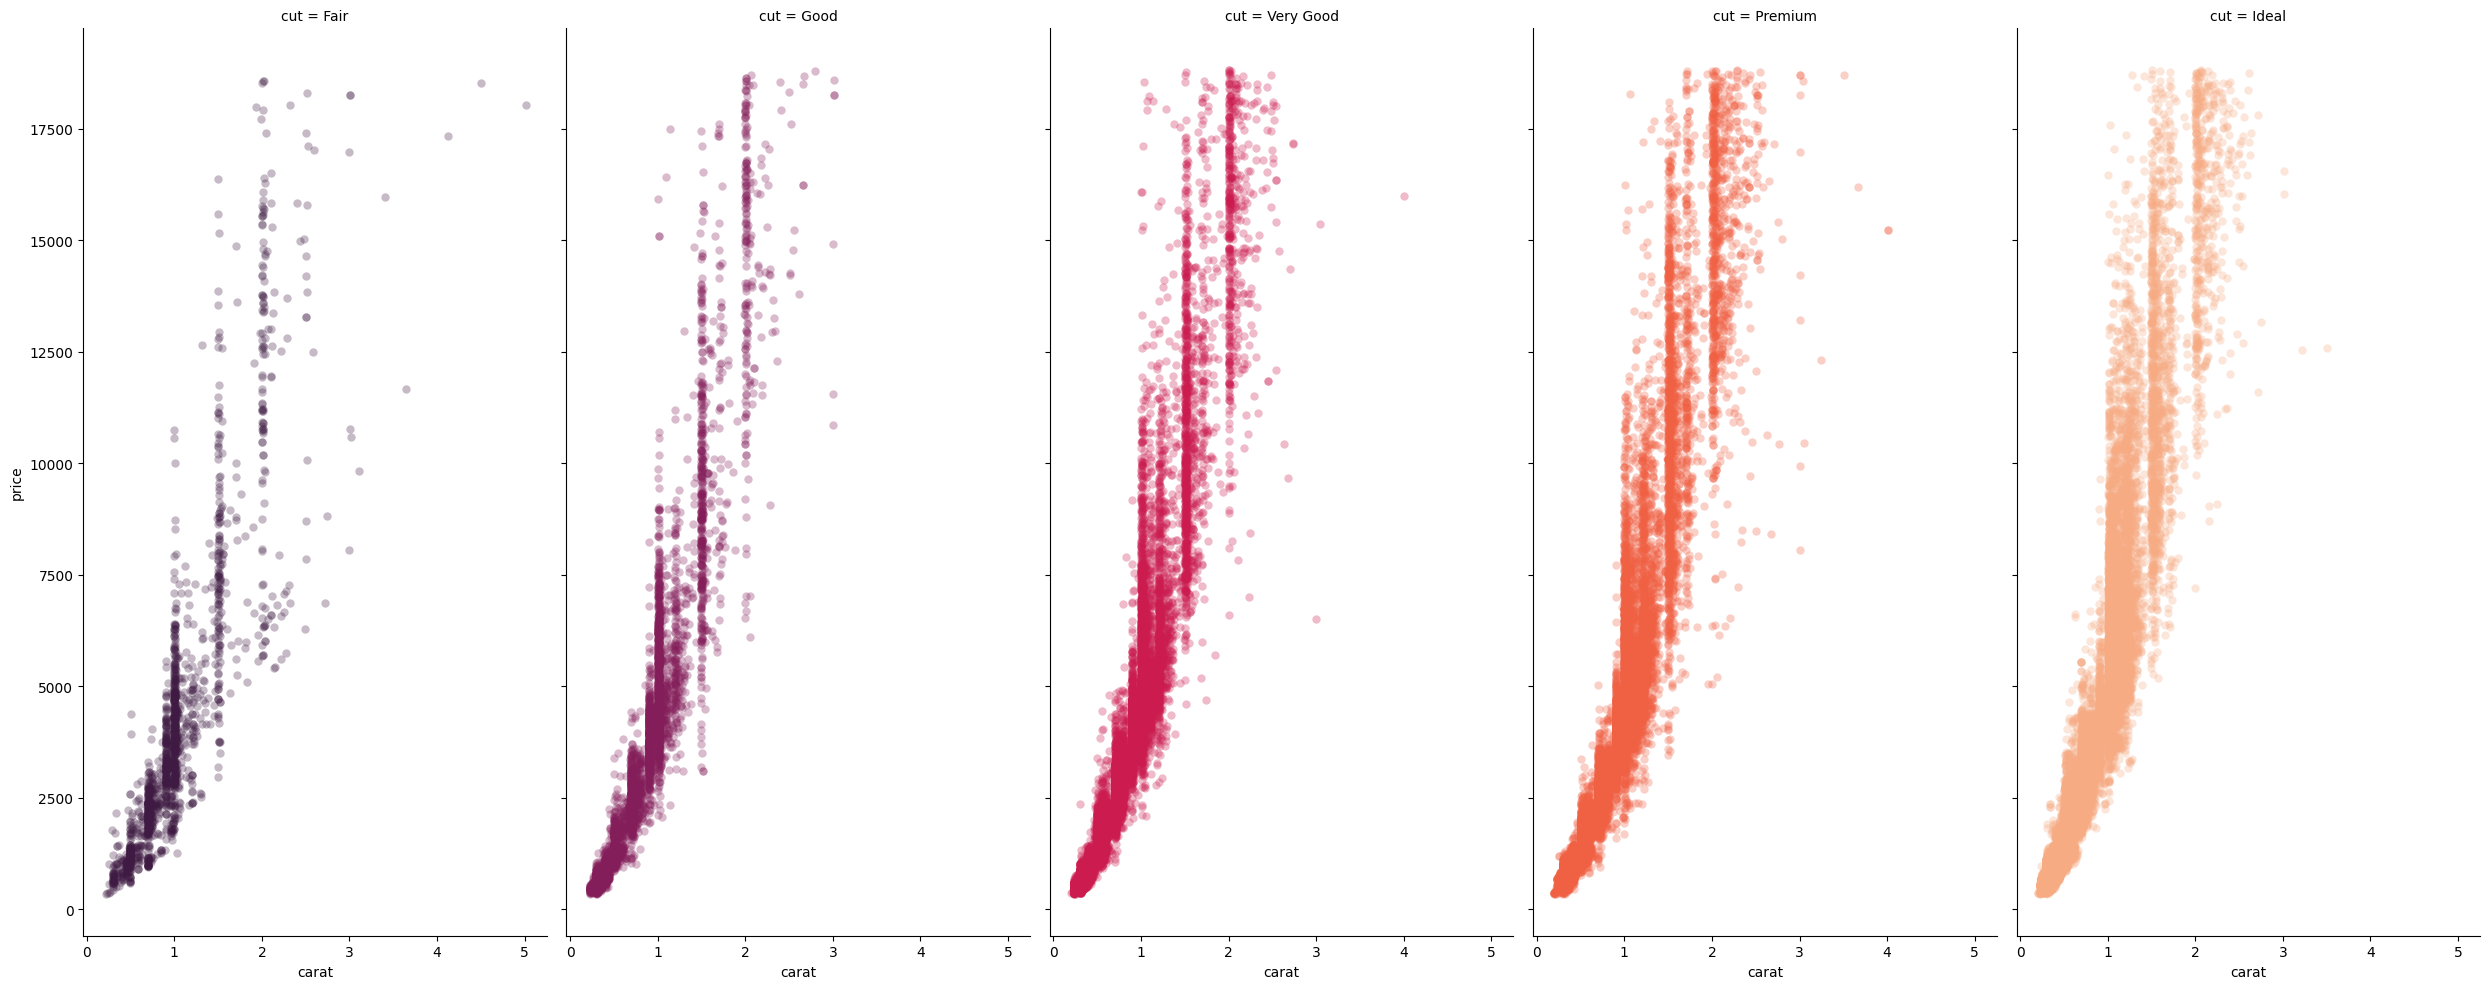

In [12]:
g= sns.FacetGrid(df, 
        col='cut', hue='cut', palette='rocket',
        height=10, aspect=0.5)
g.map_dataframe(sns.scatterplot, x='carat', y='price',
        alpha=0.3, linewidth=0)

Well, the plots are separated. And indeed, it seems to be the case that better cuts have a higher price at lower carats. Lets try to confirm that with a `lowess` model, which stands for `locally weighted scatterplot smoothing`.

(0.0, 20000.0)

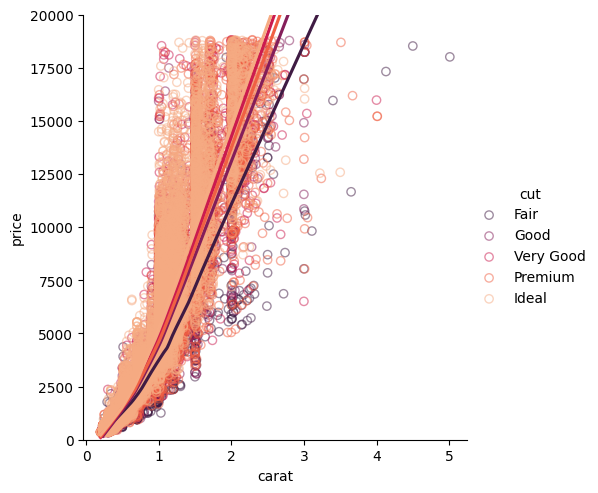

In [13]:
g = sns.lmplot(data=df, x='carat', y='price',
        hue='cut', palette='rocket',
        lowess=True, scatter_kws={'facecolors':'none', 'alpha':0.5})
plt.ylim(0, 20000)

Now, that seems to confirm what we thought. Changing the marker might make things a bit clearer

(0.0, 20000.0)

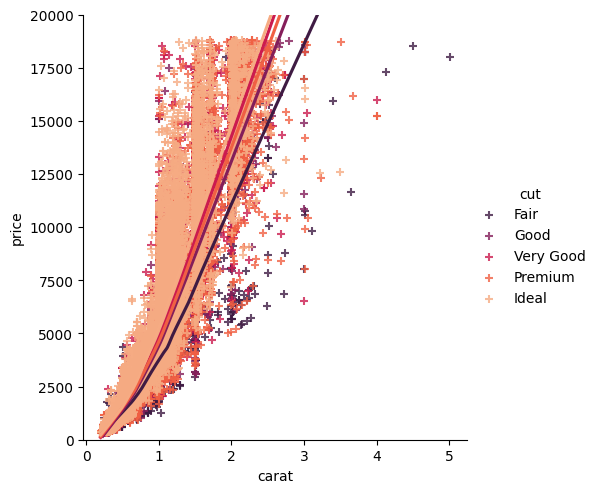

In [14]:
sns.lmplot(data=df, x='carat', y='price',
        hue='cut', palette='rocket',
        lowess=True, markers='+')
plt.ylim(0, 20000)


Or dropping the markers completely:

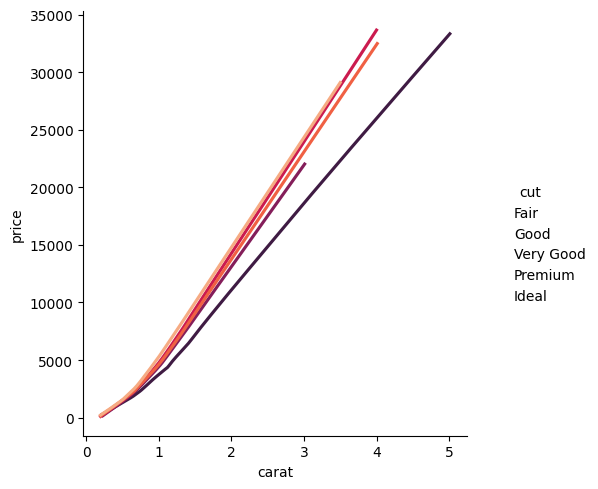

In [15]:
sns.lmplot(data=df, x='carat', y='price',
        hue='cut', palette='rocket',
        lowess=True, scatter_kws={'facecolors':'none', 'edgecolors':'none'})

It is not very consistent, but `lmplot` has actually a facet grid implemented. You can simply pass it a `col='cut'` parameter.

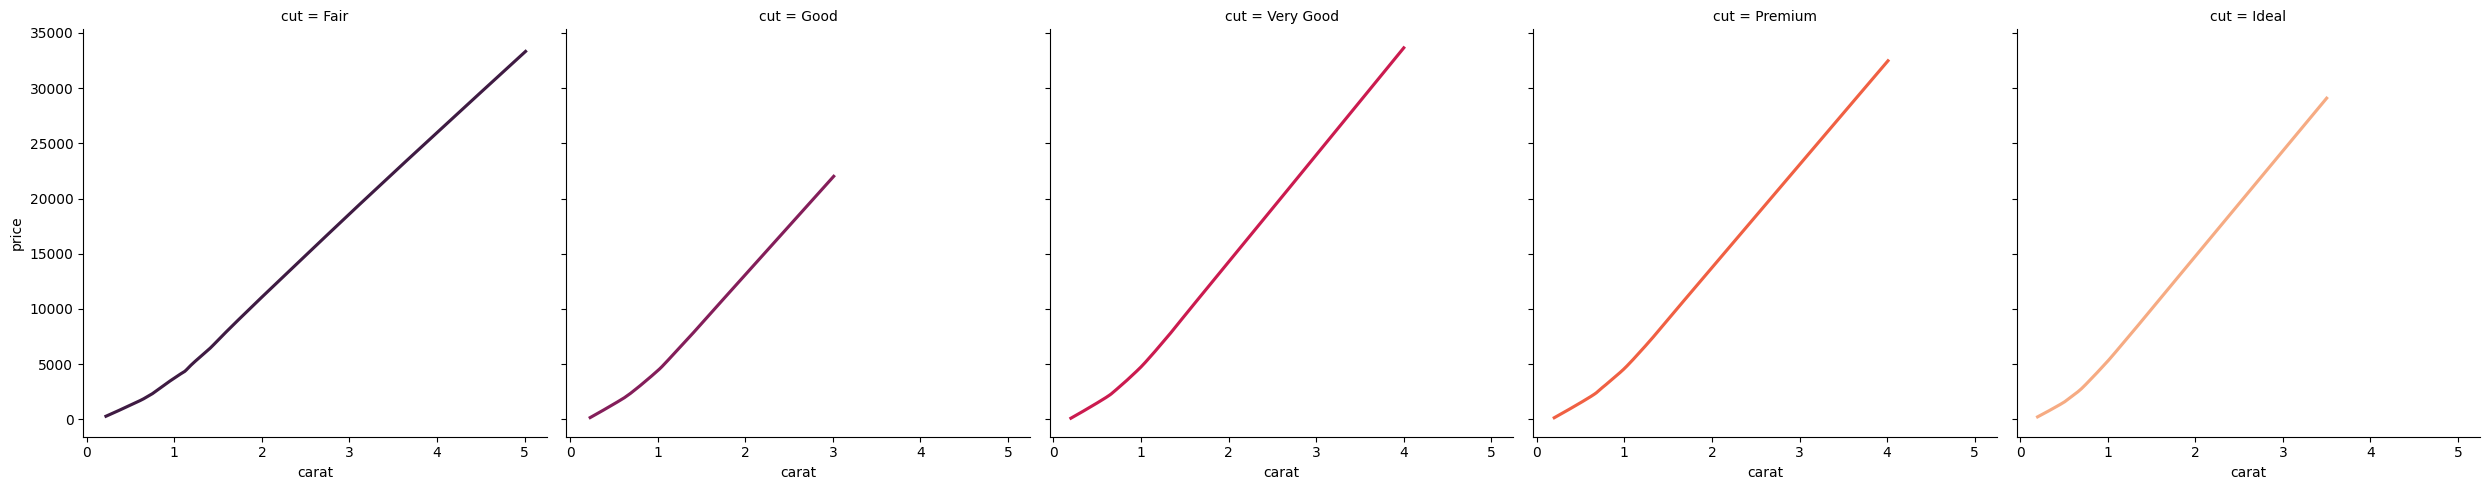

In [16]:
sns.lmplot(data=df, x='carat', y='price',
        hue='cut', palette='rocket',
        lowess=True, scatter_kws={'facecolors':'none', 'edgecolors':'none'},
        col='cut')

But this is looking too empty again. 
Now let's try to find more properties that influence the price. We have `clarity`. That might influence the price, too. Let's use the plot we had, and add an extra dimension. But first make sure, clarity is categorical.

In [17]:
clarityorder = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
df.clarity = df.clarity.astype('category')
df.clarity.cat.set_categories(clarityorder, inplace=True)

/var/folders/80/8s5yj3pd3y1_r8kgp_nlz26c0000gn/T/ipykernel_37337/1855115832.py:3: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  df.clarity.cat.set_categories(clarityorder, inplace=True)


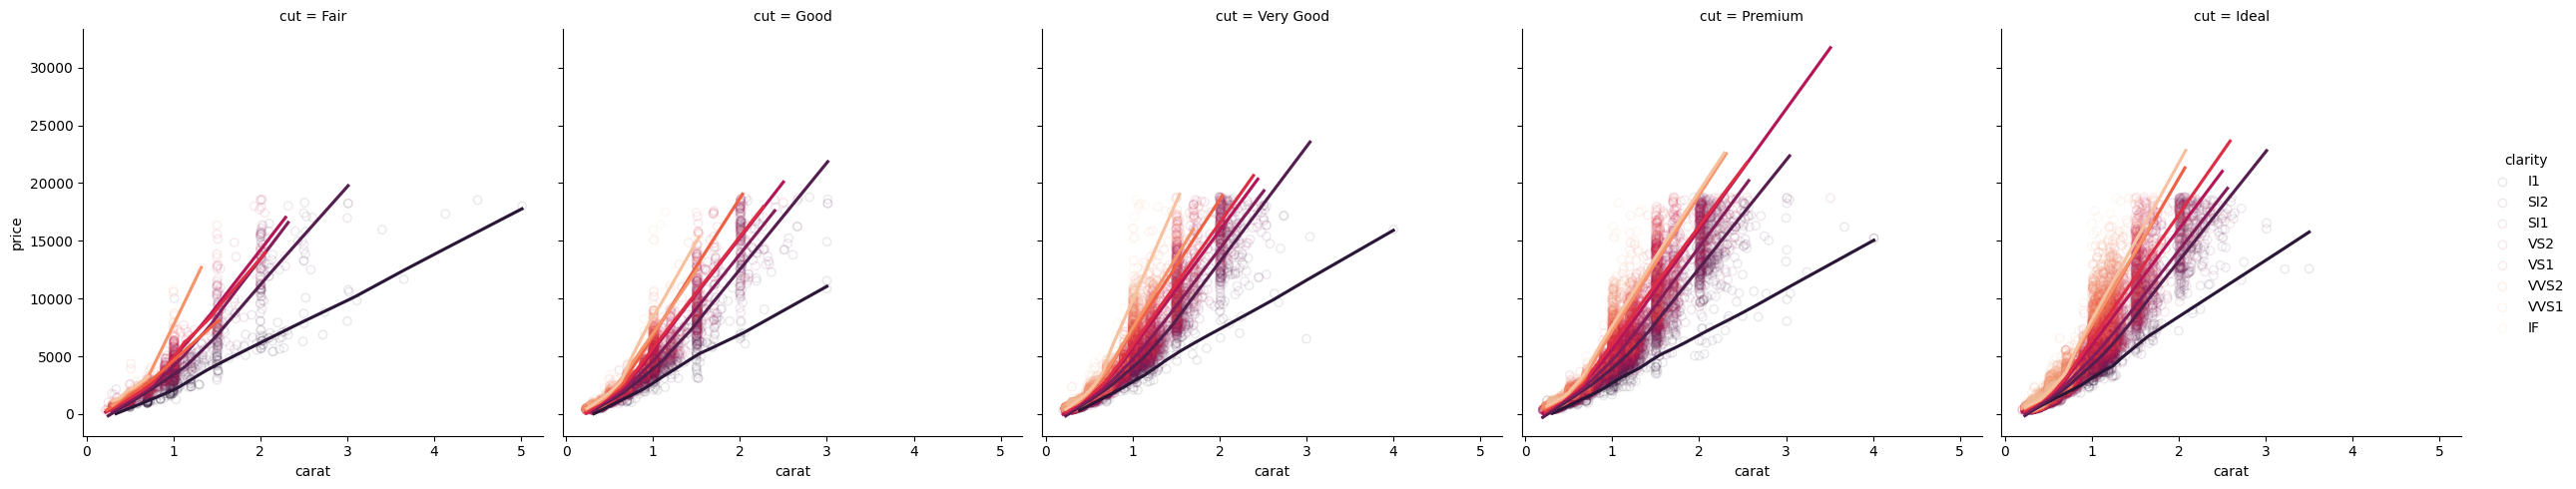

In [18]:
sns.lmplot(data=df, x='carat', y='price', 
        hue='clarity', palette='rocket',
        col='cut',
        lowess=True,
        height=5,

        scatter_kws={'facecolors':'none', 'alpha':0.1})

While you might be able to see the relationships by comparing the facets, it is a bit hard to see.
Much clearer is the heatmap. First, we create a column `value`, that shows the price unit per unit of weight.
Then, we pivot the data.

In [19]:
subset = df[['cut', 'clarity', 'carat', 'price']].copy()
subset['value'] = df.apply(lambda x: x.price / x.carat, axis=1)
hm = pd.pivot_table(subset, values='value', columns='clarity', index='cut')
hm

clarity,I1,SI2,SI1,VS2,VS1,VVS2,VVS1,IF
cut,,,,,,,,
Fair,2408.676999,3849.518043,3881.119492,4125.850868,4097.220119,4225.642956,4804.241185,3941.261734
Good,2732.777457,3790.378698,3647.980407,4195.295893,4055.895913,3975.907217,3538.732972,5072.769322
Very Good,2948.736120,4025.606183,3823.951469,4204.890194,4104.368772,3939.277069,3695.184656,5399.240302
Premium,2810.755709,4162.311539,4043.922586,4350.007808,4444.214243,4486.345234,4008.321450,4849.732259
Ideal,3287.589725,3947.685121,3775.626371,3814.120328,4042.249781,4259.976461,3884.905935,3850.829216


<AxesSubplot: xlabel='clarity', ylabel='cut'>

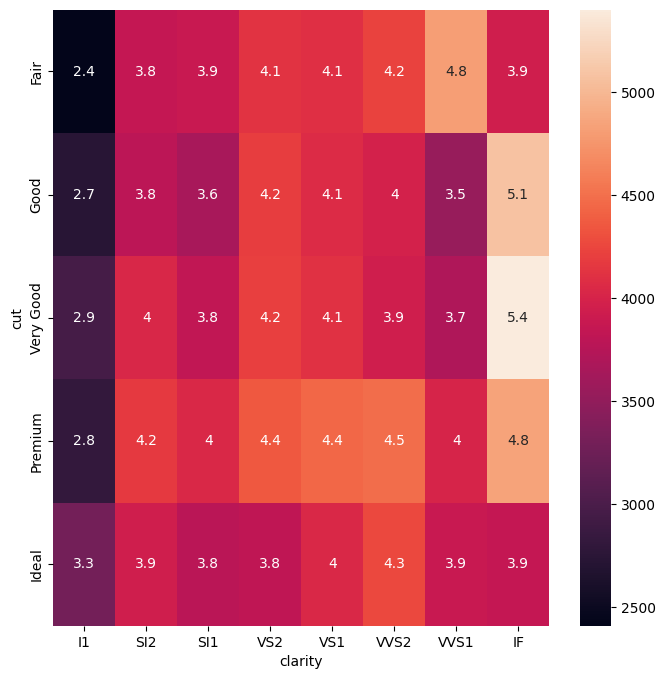

In [20]:
sns.heatmap(hm, annot=hm/1000)

Interestingly, we can see a hotspot here: If your cut is very good, and clarity is the best, you get about 5k for every carat of diamond. Improving the cut will lower the price per carat! You could try another palette to make it clearer.

<AxesSubplot: xlabel='clarity', ylabel='cut'>

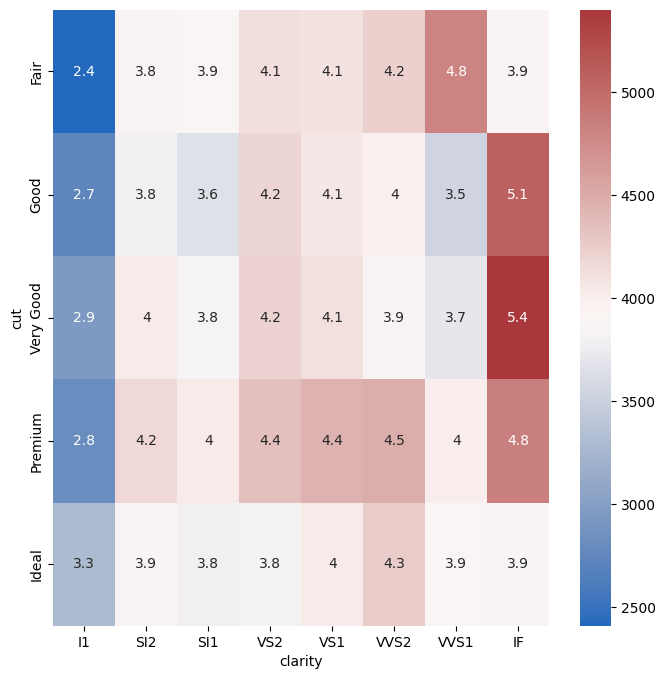

In [21]:
sns.heatmap(hm, annot=hm/1000, cmap='vlag')

Interesting, this shows that dropping the clarity even a bit will give you a price below the mean value. I had not expected that a medium clarity would give a higher price per unit. Maybe it has something to do with outliers? Pivot_table uses 'mean', so let's switch to the median.

<AxesSubplot: xlabel='clarity', ylabel='cut'>

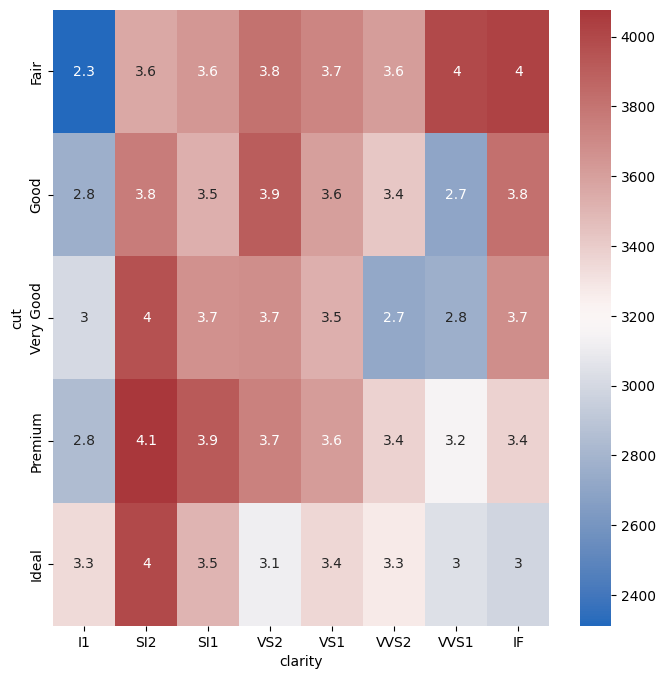

In [22]:
hm = pd.pivot_table(subset, values='value', columns='clarity', index='cut', aggfunc='median')
sns.heatmap(hm, annot=hm/1000, cmap='vlag')

This raises other questions. But there don't seem to be these sudden drops. Outliers do have an impact here! Still, it might be unexpected that you get the most "bang for you buck" with worse cuts, but better clarity or better cuts, but worse clarity. 

Let's try to get a grip on these outliers.  We could wonder what the distribution actually is, for every category. So, we want to look at the distribution of the prices in every clarity group.
Let's put the clarity on the x-axis, and the prices on the y-axis, with a boxplot.

<AxesSubplot:xlabel='clarity', ylabel='price'>

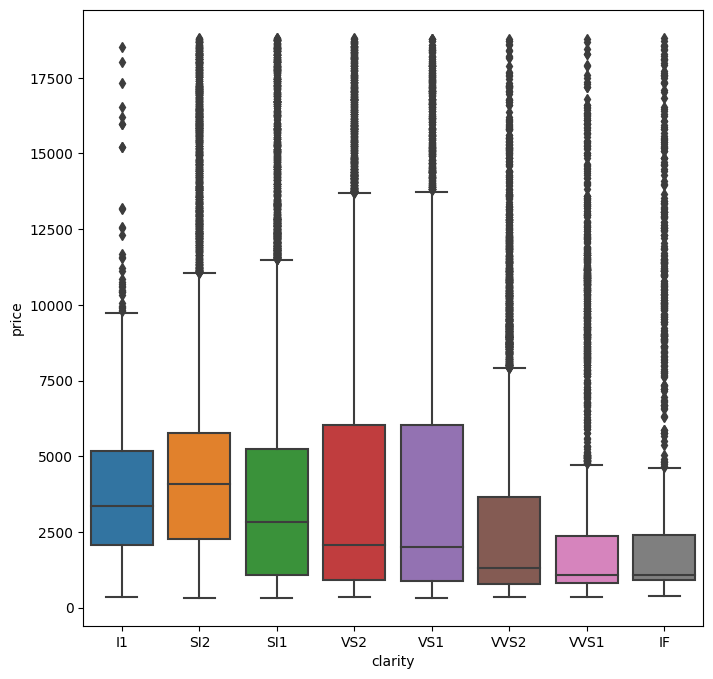

In [22]:
sns.boxplot(data=subset, x='clarity', y='price')

Well, that's something you might not have expected. What's going on? The carat has the biggest impact on price, right? So we might want to put the caret on the x-axis. But we run into problems if we do that just like this:

<AxesSubplot:xlabel='carat', ylabel='price'>

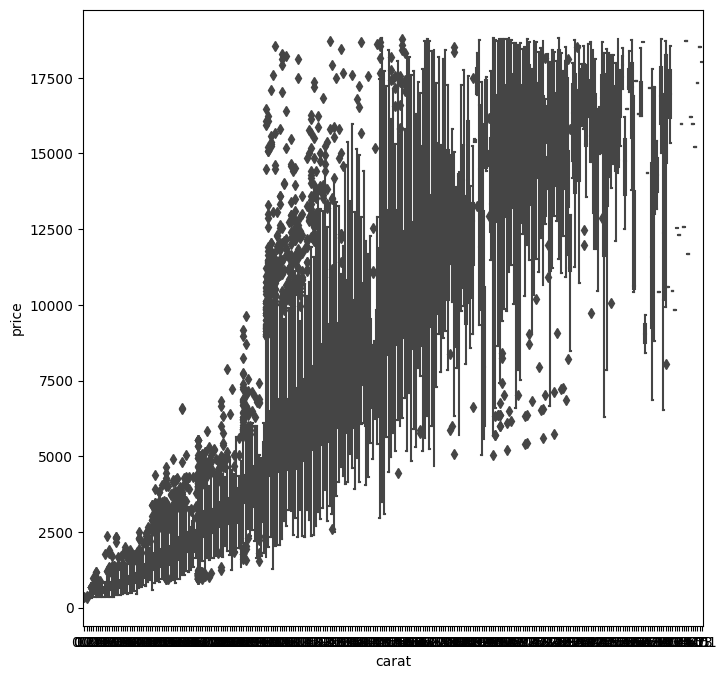

In [23]:
sns.boxplot(data=subset, x='carat', y='price')

What's going on? `carat` is a continuous variable. If we want to make boxplot, we need groups on which we want to calculate a boxplot. So let's make our own bin's on the x-axis to fix this.


In [24]:
subset['bins'] = pd.cut(df['carat'], bins=5)

<AxesSubplot:xlabel='bins', ylabel='price'>

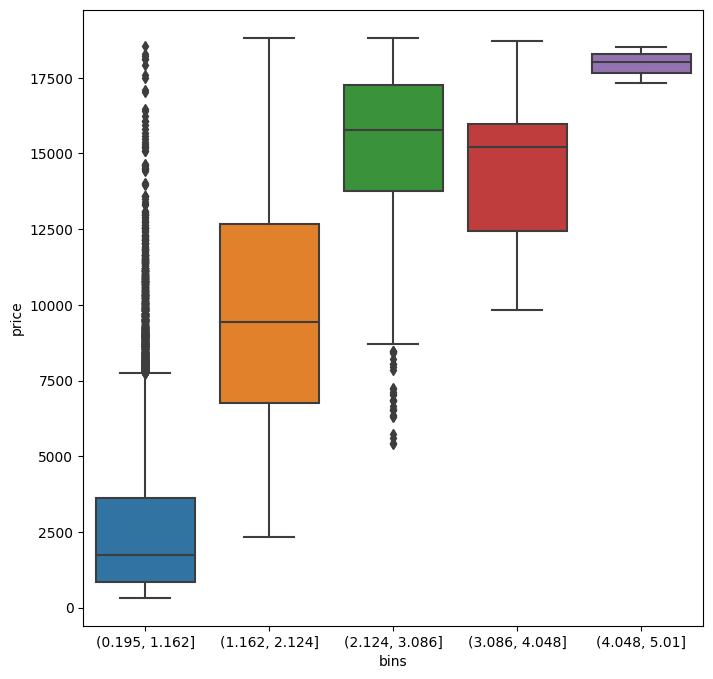

In [25]:
sns.boxplot(data=subset, x='bins', y='price')

This looks better! We can see how the price grows in every group. We can also see the outliers, and how the groups get smaller. Maybe we can split this up again? The weirdness seems to be happeing in the lowest carat group.

Let's say, we could use clarity to split up the caratbins into even smaller groups?

<AxesSubplot:xlabel='bins', ylabel='price'>

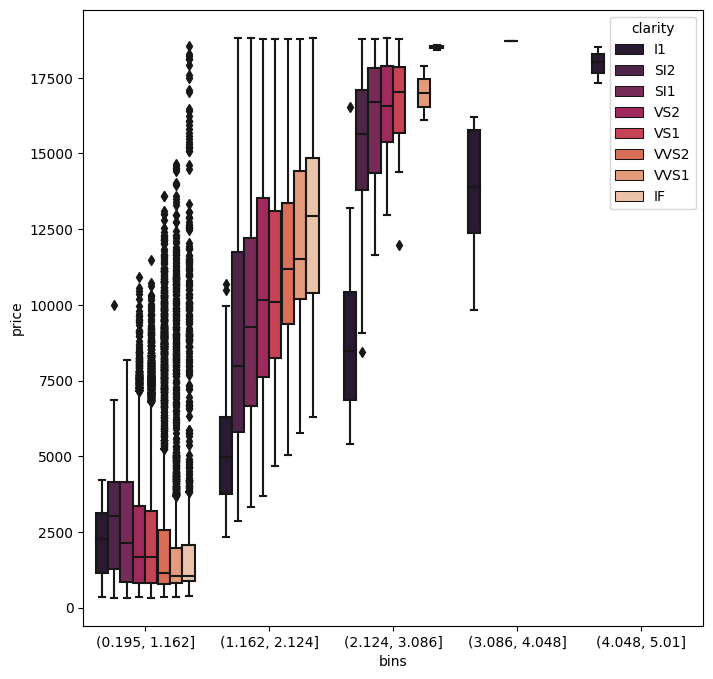

In [26]:
sns.boxplot(data=subset, x='bins', y='price', hue='clarity', palette='rocket')

This gives a really nice overview. We can still see how the groups differ in size. We can also see very clearly how the clarity for the small diamonds has an impact on price, but isn't distributed normally. For the rest of the groups, there is more or less a normal distribution.

Let's try to zoom in on the weird subset.

53940

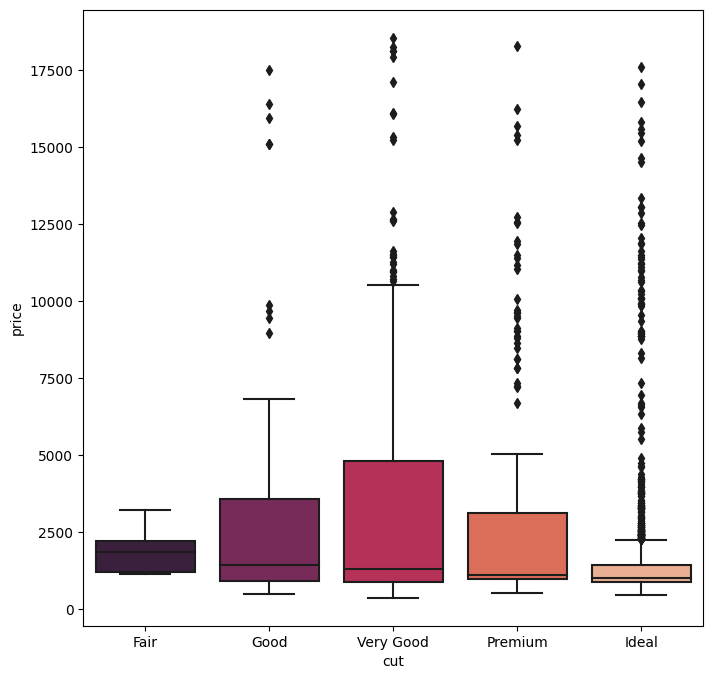

In [27]:
subset2 = df[(df.carat < 1.162) & (df.clarity == 'IF')]
sns.boxplot(data=subset2, x ='cut', y='price', palette='rocket')
len(subset)


Ok, now zoom in even further on the 'ideal' group.

In [28]:
colororder = ['D', 'E', 'F', 'G', 'H', 'I', "J"]
df.color = df.color.astype('category')
df.color.cat.set_categories(colororder, inplace=True)

/Users/raoulgrouls/Library/Caches/pypoetry/virtualenvs/dme22-EYaUUFkp-py3.9/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2747: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


<AxesSubplot:xlabel='color', ylabel='price'>

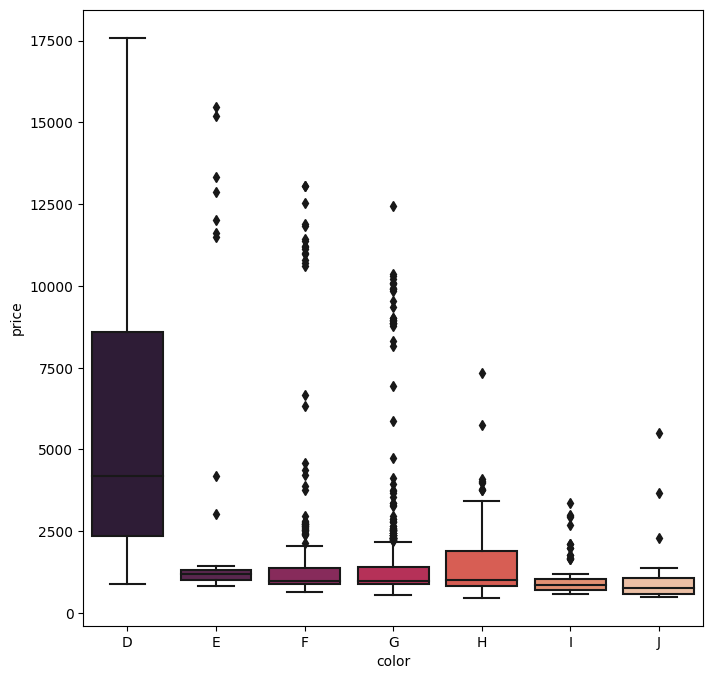

In [29]:
subset2 = df[(df.carat < 1.162) & (df.clarity == 'IF') & (df.cut == 'Ideal')]
sns.boxplot(data=subset2, x ='color', y='price', palette='rocket')

And add the F and G color groups.

<AxesSubplot:xlabel='carat', ylabel='price'>

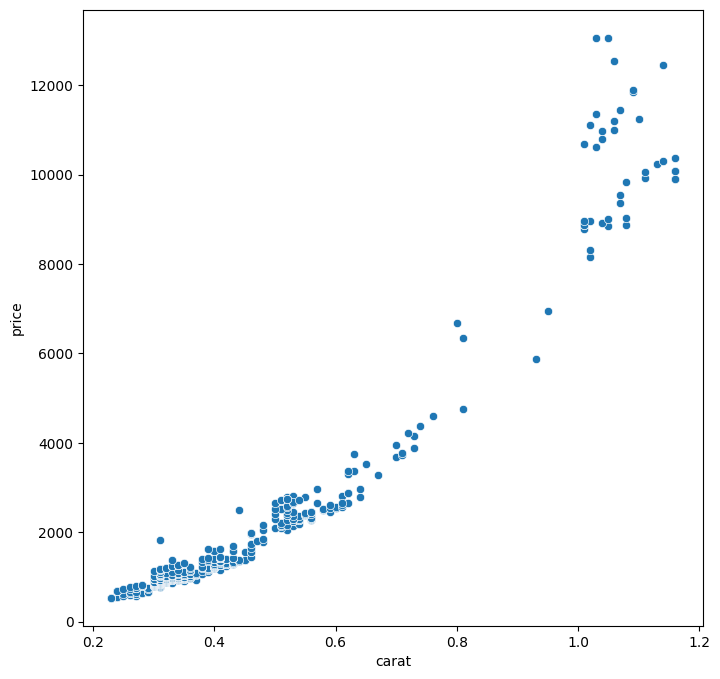

In [30]:
subset2 = df[(df.carat < 1.162) & (df.clarity == 'IF') & (df.cut == 'Ideal') & ((df.color == 'F') | (df.color == 'G'))]
sns.scatterplot(data=subset2, x='carat', y='price')

Ah,  there we have it. The group between 0.8-1.0 is missing. This gives the boxplot the unbalanced look. If this was a normal distribution, we would have expected diamonds between 0.8 and 1.0. This is a pattern we actually could have noticed already in the first plots. For some reason, carats tend to converge be distributed more around the start of a carat, and tend to be very rare close to the end of a carat. My hypothesis is, that this is caused by a human decision. We can see how the carat converges to certain numbers by checking the histogram.

In [31]:
df['ceil'] = np.ceil(df.carat)

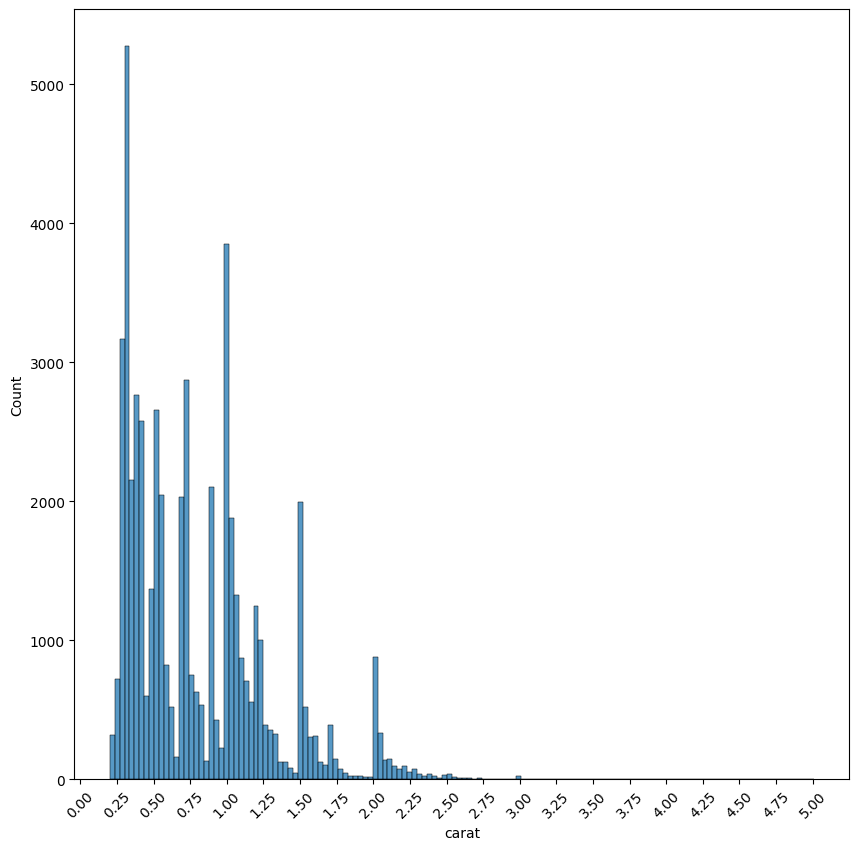

In [32]:
fig, ax = plt.subplots(figsize=(10,10))

ax = sns.histplot(data=df, x='carat')
ticks = np.linspace(0, 5, 21)
labels = ['{:.2f}'.format(x) for x in ticks]
ax.set_xticks(ticks)
ax.set_xticklabels(labels, rotation=45)
plt.show()

This confirms my hypothesis. Carat seems to diverge towards nice round numbers. You find peaks at 0.25, 0.5, 0.75, 1.00, 1.5, 2.0. Probably this is due to how diamonds are sold, in these categories. With this, we could go to an expert to ask for clarification.

Remember we calculated a 'price increase per unit of weight'? Let's see if that changes what is going on.


<AxesSubplot:xlabel='cut', ylabel='value'>

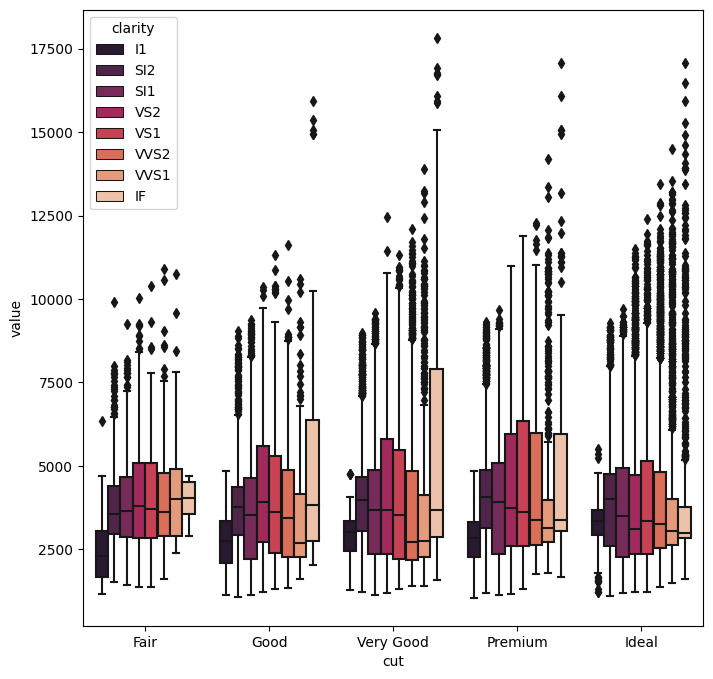

In [33]:
sns.boxplot(data=subset, x='cut', y='value', hue='clarity', palette='rocket')

It turns out, it really matters how we look at the data. Things that seem weird from one perspective, sometimes turn out to be reflections of human decisions that create non-normal distributions.

If we normalize the price, we can see that there is some other process going on that drives up the price per unit of diamond. Probably something like esthethics, or context, or history of the diamond, etc., that makes the diamond more valuable.

But we also see this happening more often in the Ideal group, with perfect coloring, which makes sense. These diamonds are probably rare, something we can explore with a heatmap:

<AxesSubplot:xlabel='clarity', ylabel='cut'>

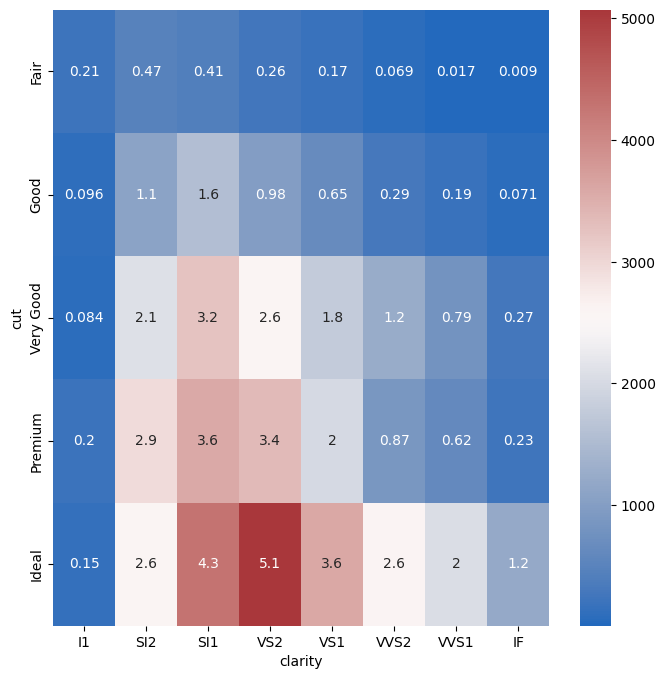

In [34]:
hm = pd.pivot_table(subset, values='value', columns='clarity', index='cut', aggfunc='count')
sns.heatmap(hm, annot=hm/1000, cmap='vlag')

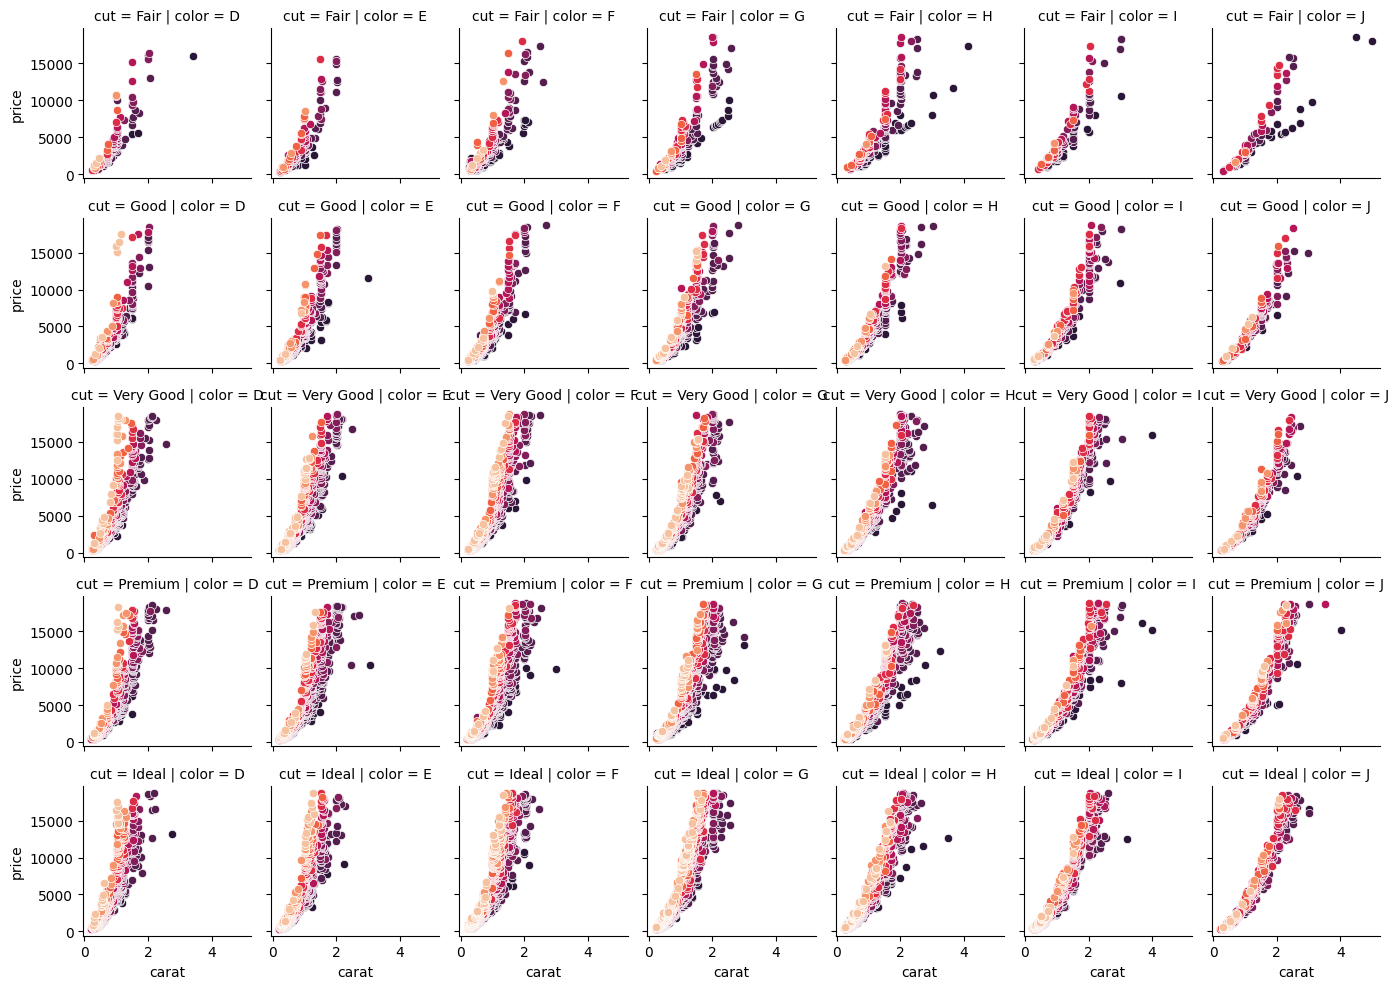

In [35]:
g= sns.FacetGrid(df, 
        row='cut', col='color',
        hue='clarity', palette='rocket',
        height=2, aspect=1)
g.map_dataframe(sns.scatterplot, x='carat', y='price')